In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# import dataset
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#bersihkan data
# membuang order yang dibatalkan
df = df.loc[df['Quantity'] > 0]

# buang data tanpa customerID
df = df[pd.notnull(df['CustomerID'])]

# buang data tanggal yang belum selesai tercatat
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# hitung total penjualan dari Quantity dan UnitPrice
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [4]:
#agregasi penjualan berdasarkan CustomerID dengan menggunakan groupby
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

# pilih kolom yang akan digunakan
customer_df.columns = ['TotalSales', 'OrderCount'] 

# buat kolom baru 'AvgOrderValue'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [5]:
#normalisasi data
rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [7]:
#periksa missing value
normalized_df.isnull().sum()

TotalSales       0
OrderCount       0
AvgOrderValue    0
dtype: int64

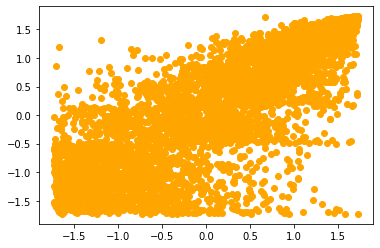

In [6]:
#plot Total Sales VS OrderCount
plt.plot(normalized_df.TotalSales, normalized_df.OrderCount, 'o', color = "orange",
label = "TotalSales VS OrderCount")

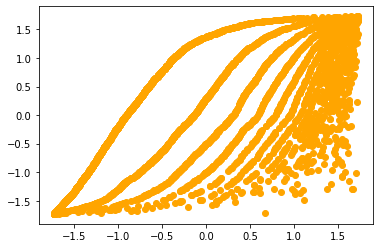

In [8]:
#plot Total Sales VS AvgOrderValue
plt.plot(normalized_df.TotalSales, normalized_df.AvgOrderValue, 'o', color = "orange",
label = "TotalSales VS AvgOrderValue")

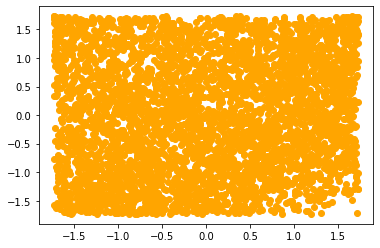

In [9]:
#plot Total Sales VS AvgOrderValue
plt.plot(normalized_df.OrderCount, normalized_df.AvgOrderValue, 'o', color = "orange",
label = "OrderCount VS AvgOrderValue")

In [53]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pct=pca.fit_transform(normalized_df)
principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3'])
variance_result=pca.explained_variance_ratio_
variance=np.sum
print(variance_result)
print(variance)

[0.69371383 0.29375594 0.01253023]
<function sum at 0x000001A70A7EA0D8>


In [35]:
finaldf= pd.concat([principal_df])

In [36]:
finaldf.head()

,pc1,pc2,pc3
0,1.097485,-2.418581,1.384713
1,2.258229,-0.324743,-0.120200
2,1.427173,-0.303274,-0.010234
3,0.538429,-2.393154,0.837941
4,-1.272055,-1.403969,0.221561


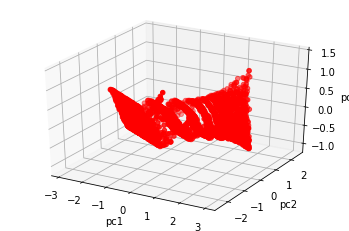

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pc1 =finaldf.pc1
pc2 =finaldf.pc2
pc3 =finaldf.pc3
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

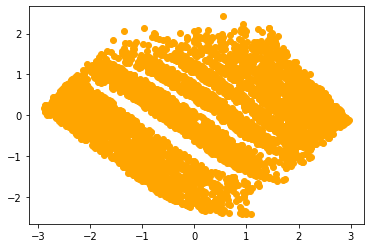

In [52]:
plt.plot(finaldf.pc1, finaldf.pc2, 'o', color = "orange",
label = "pc1 & pc2")

In [59]:
#mencari optimum cluster
from sklearn.cluster import KMeans
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(finaldf2)
    wcss.append(kmeans.inertia_)

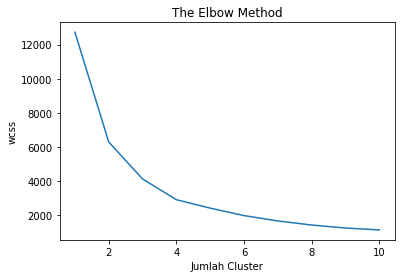

In [60]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

In [47]:
#kmeans
#buat variabel baru hanya untuk 2 PCA dengan sum of variance terbesar
feature2=['pc1','pc2']
finaldf2 = finaldf.loc[:,feature2]

In [63]:
#berdasarkan grafik elbow method, diperoleh K=4 merupakan jumlah kluster yang optimum 
kmeans = KMeans(n_clusters=4).fit(finaldf2)
centroids = kmeans.cluster_centers_
c_preds = kmeans.predict
print(centers)

[[ 0.21308113  0.95642811]
 [-1.80728302  0.2482908 ]
 [ 1.79310271  0.03315544]
 [-0.16119037 -1.16276705]]


In [42]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame 
finaldf2["cluster"] = kmeans.labels_
finaldf2

[0 2 2 ... 1 3 2]


,pc1,pc2,cluster
0,1.097485,-2.418581,0
1,2.258229,-0.324743,2
2,1.427173,-0.303274,2
3,0.538429,-2.393154,0
4,-1.272055,-1.403969,0
...,...,...,...
4293,-1.554620,0.292447,1
4294,-2.176858,0.846269,1
4295,-2.108347,0.788841,1
4296,0.908091,2.076852,3


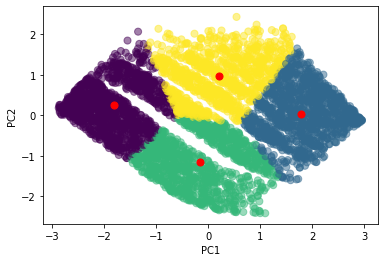

In [64]:
#plot cluster
plt.scatter(finaldf2['pc1'], finaldf2['pc2'],c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [44]:
import pandas as pd
clust_prod = finaldf2.copy()
clust_prod.head()

,pc1,pc2,cluster
0,1.097485,-2.418581,0
1,2.258229,-0.324743,2
2,1.427173,-0.303274,2
3,0.538429,-2.393154,0
4,-1.272055,-1.403969,0


In [50]:
#list anggota cluster 1
clust_prod.loc[clust_prod['cluster'] == 0]

,pc1,pc2,cluster
0,1.097485,-2.418581,0
3,0.538429,-2.393154,0
4,-1.272055,-1.403969,0
7,0.206839,-2.345325,0
8,-0.721099,-1.876366,0
...,...,...,...
4266,-0.186192,-0.960505,0
4271,0.589104,-0.439764,0
4273,-0.528943,-0.667249,0
4283,0.586777,-0.435179,0


In [54]:
#list anggota cluster 2
clust_prod.loc[clust_prod['cluster'] == 1]

,pc1,pc2,cluster
6,-2.821854,0.009014,1
14,-2.161760,-0.577607,1
24,-0.745015,-0.003876,1
32,-0.947669,0.171527,1
42,-2.830054,0.027378,1
...,...,...,...
4291,-2.053681,0.738909,1
4292,-1.604109,0.340479,1
4293,-1.554620,0.292447,1
4294,-2.176858,0.846269,1


In [55]:
#list anggota cluster 3
clust_prod.loc[clust_prod['cluster'] == 2]

,pc1,pc2,cluster
1,2.258229,-0.324743,2
2,1.427173,-0.303274,2
5,1.606822,0.756552,2
9,1.717339,-1.044115,2
12,2.214995,-0.850704,2
...,...,...,...
4278,1.824430,-0.716545,2
4279,1.929411,0.139447,2
4282,1.088987,-0.164508,2
4287,2.010235,-0.174356,2


In [56]:
#list anggota cluster 4
clust_prod.loc[clust_prod['cluster'] == 3]

,pc1,pc2,cluster
17,0.540150,-0.135915,3
41,0.626248,0.468626,3
52,0.079050,0.293062,3
53,-0.425250,0.703017,3
58,0.142257,0.882686,3
...,...,...,...
4267,0.950461,2.115084,3
4269,1.217906,0.880177,3
4270,0.004740,0.086254,3
4275,-0.177811,0.235313,3


In [57]:
#list member of cluster 3
clust_prod.loc[clust_prod['cluster'] == 3]

,pc1,pc2,cluster
17,0.540150,-0.135915,3
41,0.626248,0.468626,3
52,0.079050,0.293062,3
53,-0.425250,0.703017,3
58,0.142257,0.882686,3
...,...,...,...
4267,0.950461,2.115084,3
4269,1.217906,0.880177,3
4270,0.004740,0.086254,3
4275,-0.177811,0.235313,3
